In [16]:
import pandas as pd

# Muat dataset
df = pd.read_csv('/content/robotics.csv')

# Tampilkan 5 baris pertama data
print(df.head())

                                         Description    Price  \
0  Cretile Explorer Kit - DIY Robotics Electronic...   ₹5,079   
1  Cretile Pioneer Kit - A DIY kit for Robotics, ...  ₹12,879   
2  Cretile Voyager Kit - A DIY Kit & Online Cours...   ₹7,699   
3  Sparklebox DIY Edge avoiding Robotics Kit Usin...   ₹1,020   
4  WitBlox Mega Robotics Kit for 101 Projects || ...   ₹2,499   

               Rating Reviews Count  \
0  4.4 out of 5 stars            18   
1  4.5 out of 5 stars             5   
2                 NaN           NaN   
3  3.0 out of 5 stars            71   
4  4.1 out of 5 stars           632   

                                                 URL  \
0  https://www.amazon.in/gp/slredirect/picassoRed...   
1  https://www.amazon.in/gp/slredirect/picassoRed...   
2  https://www.amazon.in/gp/slredirect/picassoRed...   
3  https://www.amazon.in/gp/slredirect/picassoRed...   
4  https://www.amazon.in/WitBlox-Mega-DIY-Robotic...   

                                     

In [17]:
print("Nilai unik di kolom 'Rating':")
print(df['Rating'].unique())

Nilai unik di kolom 'Rating':
['4.4 out of 5 stars' '4.5 out of 5 stars' nan '3.0 out of 5 stars'
 '4.1 out of 5 stars' '4.0 out of 5 stars' '3.2 out of 5 stars'
 '3.9 out of 5 stars' '4.2 out of 5 stars' '3.6 out of 5 stars'
 '3.4 out of 5 stars' '3.8 out of 5 stars' '4.3 out of 5 stars'
 '5.0 out of 5 stars' '3.5 out of 5 stars' '3.1 out of 5 stars'
 '3.3 out of 5 stars' '3.7 out of 5 stars']


In [18]:
# Buat salinan eksplisit untuk mencegah SettingWithCopyWarning
df_cleaned = df.copy()

# Hapus baris dengan nilai kosong di kolom 'Rating'
df_cleaned.dropna(subset=['Rating'], inplace=True)

# Bersihkan kolom 'Rating' untuk hanya mengambil angka
# Kita asumsikan formatnya "X.X out of Y stars"
df_cleaned['Rating'] = df_cleaned['Rating'].str.extract('(\d+\.\d+)').astype(float)

# Tampilkan kembali informasi data dan 5 baris pertama
print(df_cleaned.info())
print("\nData setelah dibersihkan:")
print(df_cleaned.head())

<class 'pandas.core.frame.DataFrame'>
Index: 2300 entries, 0 to 2848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Description    2300 non-null   object 
 1   Price          2300 non-null   object 
 2   Rating         2300 non-null   float64
 3   Reviews Count  2300 non-null   object 
 4   URL            2300 non-null   object 
 5   Image link     2300 non-null   object 
dtypes: float64(1), object(5)
memory usage: 125.8+ KB
None

Data setelah dibersihkan:
                                         Description    Price  Rating  \
0  Cretile Explorer Kit - DIY Robotics Electronic...   ₹5,079     4.4   
1  Cretile Pioneer Kit - A DIY kit for Robotics, ...  ₹12,879     4.5   
3  Sparklebox DIY Edge avoiding Robotics Kit Usin...   ₹1,020     3.0   
4  WitBlox Mega Robotics Kit for 101 Projects || ...   ₹2,499     4.1   
5  Spitin 13-in-1 Solar Power Robots Creation Toy...     ₹898     4.0   

  Reviews Count       

<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-193875800.py:9: SyntaxWarning: invalid escape sequence '\d'
  df_cleaned['Rating'] = df_cleaned['Rating'].str.extract('(\d+\.\d+)').astype(float)


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisiasi TF-IDF Vectorizer
# Menggunakan 'english' stop words untuk memfilter kata-kata umum seperti 'a', 'the', dll.
tfidf = TfidfVectorizer(stop_words='english')

# Ubah kolom 'Description' menjadi matriks TF-IDF
tfidf_matrix = tfidf.fit_transform(df_cleaned['Description'])

# Tampilkan ukuran matriks TF-IDF
# Output akan menunjukkan (jumlah produk, jumlah kata unik)
print("Ukuran matriks TF-IDF:")
print(tfidf_matrix.shape)

Ukuran matriks TF-IDF:
(2300, 235)


In [20]:
from sklearn.metrics.pairwise import cosine_similarity

# Hitung matriks kemiripan
cosine_sim = cosine_similarity(tfidf_matrix)

# Tampilkan ukuran matriks kemiripan
print("Ukuran matriks kemiripan:")
print(cosine_sim.shape)

Ukuran matriks kemiripan:
(2300, 2300)


In [21]:
# --- Jalankan semua kode dari awal hingga matriks cosine_sim ---

# Fungsi yang diperbaiki untuk mendapatkan rekomendasi
def get_recommendations(description, cosine_sim=cosine_sim, indices=indices):
    # Dapatkan indeks dari deskripsi produk yang cocok
    idx = indices[description]

    # Dapatkan skor kemiripan dari produk tersebut
    # dan ubah array NumPy menjadi list Python
    sim_scores = list(enumerate(cosine_sim[idx].tolist()))

    # Urutkan berdasarkan skor kemiripan
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Ambil 10 produk yang paling mirip (terkecuali produk itu sendiri)
    sim_scores = sim_scores[1:11]

    # Dapatkan indeks produk-produk yang direkomendasikan
    product_indices = [i[0] for i in sim_scores]

    # Kembalikan daftar deskripsi produk yang direkomendasikan
    return df_cleaned['Description'].iloc[product_indices]

# Uji coba fungsi
# Kamu bisa ganti dengan salah satu deskripsi produk dari data kamu
product_description = df_cleaned['Description'].iloc[0]
print("Rekomendasi untuk produk:", product_description)
print(get_recommendations(product_description))

Rekomendasi untuk produk: Cretile Explorer Kit - DIY Robotics Electronic STEM Projects - 8 to 16 Years Kids: Unlimited Project. Rechargeable Battery Included
1     Cretile Pioneer Kit - A DIY kit for Robotics, ...
3     Sparklebox DIY Edge avoiding Robotics Kit Usin...
4     WitBlox Mega Robotics Kit for 101 Projects || ...
5     Spitin 13-in-1 Solar Power Robots Creation Toy...
6     Sparklebox (6 IN 1) Mega Robotics kit 2 |Age 1...
7     Quad Store STEM based DIY learning activity ed...
8     Avishkaar Metal Robotics Super Starter Kit, Mu...
9                                              Robotics
10    Avishkaar Metal Robotics Advanced Kit, Multico...
11    Avishkaar Metal Robotics Pro Kit, Multicolor, ...
Name: Description, dtype: object


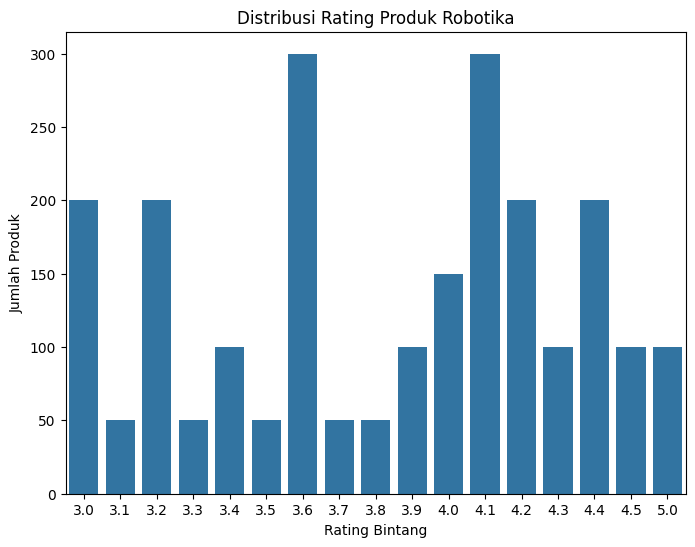

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah produk untuk setiap rating
rating_counts = df_cleaned['Rating'].value_counts().sort_index()

# Buat bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.title('Distribusi Rating Produk Robotika')
plt.xlabel('Rating Bintang')
plt.ylabel('Jumlah Produk')
plt.show()

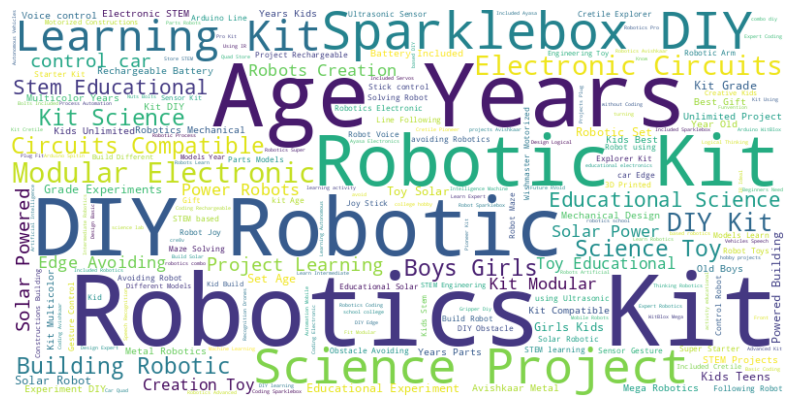

In [23]:
from wordcloud import WordCloud

# Gabungkan semua deskripsi menjadi satu teks
all_descriptions = ' '.join(df_cleaned['Description'])

# Buat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

# Tampilkan visualisasinya
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
# Asumsikan kamu sudah menjalankan semua kode dari awal sampai mendapatkan fungsi get_recommendations
# Pilih sebuah produk acak untuk dijadikan contoh
contoh_produk = df_cleaned['Description'].iloc[10]

# Dapatkan daftar produk yang direkomendasikan
daftar_rekomendasi = get_recommendations(contoh_produk)

# Tampilkan produk yang menjadi acuan
print("--------------------------------------------------")
print("Produk Asli:")
print(contoh_produk)
print("--------------------------------------------------")

# Tampilkan produk yang direkomendasikan dalam format tabel
print("Rekomendasi untuk produk di atas:")
recommended_df = df_cleaned[df_cleaned['Description'].isin(daftar_rekomendasi)].copy()
recommended_df = recommended_df[['Description', 'Price', 'Rating']]

print(recommended_df)

--------------------------------------------------
Produk Asli:
Avishkaar Metal Robotics Pro Kit, Multicolor, 12+ Years, 70+ Parts, 200+ Models, Learn Expert Robotics, Mechanical Design & Expert Coding
--------------------------------------------------
Rekomendasi untuk produk di atas:
                                            Description    Price  Rating
1     Cretile Pioneer Kit - A DIY kit for Robotics, ...  ₹12,879     4.5
3     Sparklebox DIY Edge avoiding Robotics Kit Usin...   ₹1,020     3.0
4     WitBlox Mega Robotics Kit for 101 Projects || ...   ₹2,499     4.1
5     Spitin 13-in-1 Solar Power Robots Creation Toy...     ₹898     4.0
6     Sparklebox (6 IN 1) Mega Robotics kit 2 |Age 1...   ₹1,699     3.2
...                                                 ...      ...     ...
2802                                           Robotics     ₹195     4.0
2803  Avishkaar Metal Robotics Advanced Kit, Multico...   ₹6,825     3.9
2804  Avishkaar Metal Robotics Pro Kit, Multicolor, ... 